In this notebook we analize games data:
- how many games there are
- how many games with more than 10000 votes there are
- what are the possible categories, mechanics, game types and designers of games and what are their distributions

# General games data

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
sns.set(rc={'figure.figsize':(11.7,8.27)})

DATA_ROOT = '../../../data'

In [19]:
games_df = pd.read_json(f'{DATA_ROOT}/bgg_GameItem.jl', lines = True)

In [20]:
# Number of games
len(games_df)

104268

In [21]:
# Data available
games_df.columns

Index(['add_rank', 'alt_name', 'artist', 'avg_rating', 'bayes_rating',
       'best_rating', 'bgg_id', 'category', 'complexity', 'description',
       'designer', 'easiest_complexity', 'family', 'game_type',
       'hardest_complexity', 'highest_language_dependency', 'image_file',
       'image_url', 'language_dependency', 'lowest_language_dependency',
       'max_players', 'max_players_best', 'max_players_rec', 'max_time',
       'mechanic', 'min_age', 'min_age_rec', 'min_players', 'min_players_best',
       'min_players_rec', 'min_time', 'name', 'num_votes', 'publisher', 'rank',
       'stddev_rating', 'url', 'video_url', 'worst_rating', 'year',
       'implementation', 'expansion', 'integration', 'cooperative',
       'compilation', 'compilation_of'],
      dtype='object')

In [22]:
top_voted = np.sort(games_df.loc[games_df['num_votes'] > 10000]['num_votes'].dropna().astype(int))[::-1]

In [23]:
# Number of games with over 10,000 votes
len(top_voted)

346

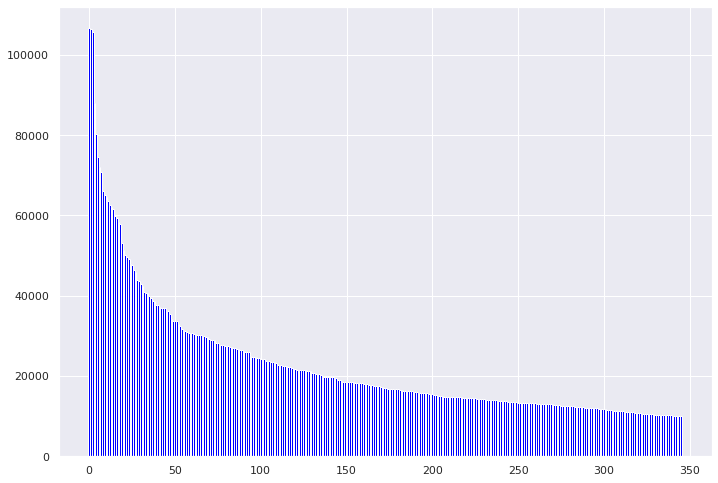

In [24]:
# Votes distribution amongst top rated games
plt.bar(np.arange(len(top_voted)), top_voted, color='blue', width=1.0)
pass

In [25]:
# Sample of data
games_df[['name', 'category', 'mechanic', 'year', 'avg_rating', 'num_votes', 'complexity']].head(100)

,name,category,mechanic,year,avg_rating,num_votes,complexity
0,Die Macher,"[Economic:1021, Negotiation:1026, Political:1001]","[Alliances:2916, Area Majority / Influence:208...",1986.0,7.61358,5313.0,4.3219
1,Dragonmaster,"[Card Game:1002, Fantasy:1010]",[Trick-taking:2009],1981.0,6.64053,560.0,1.9630
2,Samurai,"[Abstract Strategy:1009, Medieval:1035]","[Area Majority / Influence:2080, Hand Manageme...",1998.0,7.45423,15042.0,2.4865
3,Tal der Könige,[Ancient:1050],"[Action Points:2001, Area Majority / Influence...",1992.0,6.59418,340.0,2.6667
4,Acquire,"[Economic:1021, Territory Building:1086]","[Hand Management:2040, Investment:2910, Market...",1964.0,7.33917,18528.0,2.5031
5,Mare Mediterraneum,"[Civilization:1015, Nautical:1008]",[Dice Rolling:2072],1989.0,6.55370,81.0,3.0000
6,Cathedral,[Abstract Strategy:1009],"[Enclosure:2043, Pattern Building:2048, Patter...",1978.0,6.52302,3302.0,1.7950
7,Lords of Creation,"[Civilization:1015, Fantasy:1010]",[Modular Board:2011],1993.0,6.12270,200.0,2.4000
8,El Caballero,[Exploration:1020],"[Area Majority / Influence:2080, Tile Placemen...",1998.0,6.45258,1387.0,3.1824
9,Elfenland,"[Fantasy:1010, Travel:1097]","[Card Drafting:2041, Hand Management:2040, Net...",1998.0,6.69743,8270.0,2.1568


# Game attributes data

In [26]:
def describe(attribute, n_most_popular=20, n_least_popular=5):
    print(f"Number of unique values: {len(np.unique(np.hstack(games_df[attribute].dropna())))}")
    print(f"Number of missing fields: {np.sum(games_df[attribute].isna())}")
    value_counts = pd.Series(np.hstack(games_df[attribute].dropna())).value_counts()
    print()
    print(f"{n_most_popular} most popular values:")
    print(value_counts.head(n_most_popular))
    print()
    print(f"{n_least_popular} least popular values:")
    print(value_counts[::-1].head(n_least_popular))

def plot(attribute):
    value_counts = pd.Series(np.hstack(games_df[attribute].dropna())).value_counts()
    plt.figure(figsize=(12,4))
    sns.barplot(x = value_counts.index, y = value_counts.values).set(xticklabels=[])

## Mechanics

In [27]:
describe('mechanic')

Number of unique values: 182
Number of missing fields: 15789

20 most popular values:
Dice Rolling:2072                     23654
Roll / Spin and Move:2035             15778
Hand Management:2040                  12517
Set Collection:2004                   11864
Card Drafting:2041                     6943
Simulation:2070                        6647
Hexagon Grid:2026                      6570
Variable Player Powers:2015            6222
Tile Placement:2002                    5597
Cooperative Game:2023                  5308
Memory:2047                            4938
Grid Movement:2676                     4562
Point to Point Movement:2078           4384
Modular Board:2011                     4097
Area Majority / Influence:2080         4042
Auction/Bidding:2012                   3984
Trading:2008                           3594
Simultaneous Action Selection:2020     3562
Area Movement:2046                     3549
Player Elimination:2685                3459
dtype: int64

5 least popular valu

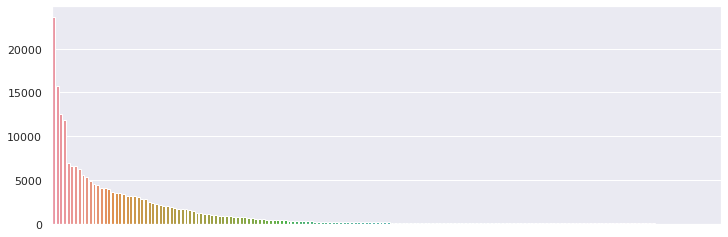

In [28]:
plot('mechanic')

## Categories

In [29]:
describe('category')

Number of unique values: 84
Number of missing fields: 2089

20 most popular values:
Card Game:1002                    25684
Children's Game:1041              14126
Wargame:1019                      13566
Party Game:1030                    9562
Dice:1017                          9411
Abstract Strategy:1009             9065
Educational:1094                   8239
Fantasy:1010                       7868
Trivia:1027                        6688
Print & Play:1120                  6425
Economic:1021                      6361
Animals:1089                       6057
Movies / TV / Radio theme:1064     5767
Action / Dexterity:1032            5679
Science Fiction:1016               5678
Miniatures:1047                    5528
Fighting:1046                      5047
Humor:1079                         4964
Sports:1038                        4912
Racing:1031                        4264
dtype: int64

5 least popular values:
Fan Expansion:2687            17
Korean War:1091              107
American Ind

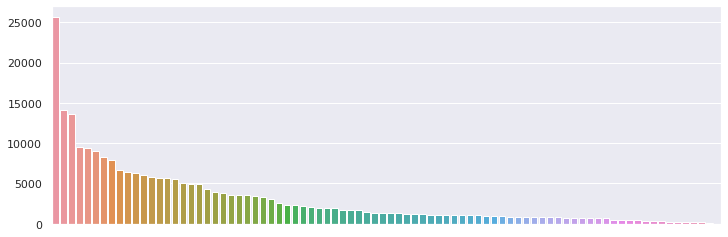

In [30]:
plot('category')

# Types

In [31]:
describe('game_type', n_least_popular=0)

Number of unique values: 12
Number of missing fields: 81657

20 most popular values:
War Game:4664           8566
Abstract Game:4666      4609
Children's Game:4665    4020
Family Game:5499        2426
Strategy Game:5497      2361
Thematic:5496           1241
Party Game:5498          647
Customizable:4667        530
Atari ST:4976              1
Commodore 64:4420          1
Arcade:4781                1
Amiga:4415                 1
dtype: int64

0 least popular values:
Series([], dtype: int64)


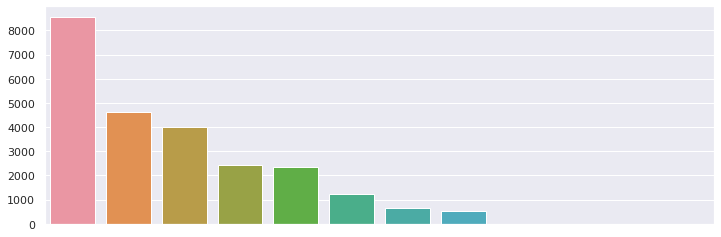

In [32]:
plot('game_type')

## Designers

In [33]:
describe('designer')

Number of unique values: 32183
Number of missing fields: 15853

20 most popular values:
(Uncredited):3           18812
Lloyd Krassner:810         905
Reiner Knizia:2            600
Charles Darrow:1268        263
Joseph Miranda:337         243
Wolfgang Kramer:7          228
Paul Rohrbaugh:812         195
James Ernest:61            186
Heinz Meister:256          167
Richard H. Berg:135        164
Ty Bomba:1747              146
Perry Moore:1257           143
Michael Rüttinger:581      139
Inka Brand:6940            131
Sid Sackson:4              131
Markus Brand:6941          130
Reinhold Wittig:94         130
Michael Schacht:86         130
Kai Haferkamp:645          129
Garrett J. Donner:315      128
dtype: int64

5 least popular values:
Ron A. Magazzu:75969     1
Lubna Zahid:123273       1
Bartosz Rzepka:100084    1
David Coleson:89178      1
Arron Watts:74944        1
dtype: int64
